In [1]:
#
import findspark
findspark.init()

#from warnings import filterwarnings
#filterwarnings(action='ignore', category=DeprecationWarning, message='`np.bool` is a deprecated alias')
#from collections import namedtuple
#import matplotlib

import pyspark.pandas as pspd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
#plt.style.use('ggplot')
#pd.options.plotting.backend = 'matplotlib'
%matplotlib inline

/opt/spark/python/pyspark/pandas/__init__.py:49: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


In [2]:
#
psdf = pspd.read_csv('data/raw/vgsales.csv')
df = pd.read_csv('data/raw/vgsales.csv')
psdf

23/04/22 08:46:59 WARN Utils: Your hostname, vmserver resolves to a loopback address: 127.0.1.1; using 192.168.0.103 instead (on interface enp0s3)
23/04/22 08:46:59 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/04/22 08:47:00 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


/opt/spark/python/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: If `index_col` is not specified for `read_csv`, the default index is attached which can cause additional overhead.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


### Conhecendo os dados

Contagem de dados ausentes

In [3]:
#
psdf.isna().sum()

/opt/spark/python/pyspark/pandas/internal.py:1573: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  fields = [
/opt/spark/python/pyspark/sql/pandas/conversion.py:486: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [16]:
#
psdf.isnull().sum()

/opt/spark/python/pyspark/pandas/internal.py:1573: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  fields = [
/opt/spark/python/pyspark/sql/pandas/conversion.py:486: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

Porém, ao ordenar por ano,a coluna **Year** atribui "N/A" para indicar que o valor real não está disponível:

In [5]:
#
psdf.sort_values(by=['Year'], ascending=False).head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,N/A,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,N/A,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,N/A,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,N/A,Fighting,N/A,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,N/A,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
624,625,Rock Band,X360,N/A,Misc,Electronic Arts,1.93,0.34,0.00,0.21,2.48
649,650,Frogger's Adventures: Temple of the Frog,GBA,N/A,Adventure,Konami Digital Entertainment,2.15,0.18,0.00,0.07,2.39
652,653,LEGO Indiana Jones: The Original Adventures,Wii,N/A,Action,LucasArts,1.54,0.63,0.00,0.22,2.39
711,713,Call of Duty 3,Wii,N/A,Shooter,Activision,1.19,0.84,0.00,0.23,2.26
782,784,Rock Band,Wii,N/A,Misc,MTV Games,1.35,0.56,0.00,0.20,2.11


A coluna **Publisher** também esta com valores "N/A"

In [6]:
#
psdf[psdf['Publisher'].equals("N/A")]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
470,471,wwe Smackdown vs. Raw 2006,PS2,N/A,Fighting,N/A,1.57,1.02,0.00,0.41,3.00
1303,1305,Triple Play 99,PS,N/A,Sports,N/A,0.81,0.55,0.00,0.10,1.46
1662,1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007,Misc,N/A,0.87,0.32,0.00,0.02,1.21
2222,2224,Bentley's Hackpack,GBA,2005,Misc,N/A,0.67,0.25,0.00,0.02,0.93
3159,3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004,Misc,N/A,0.46,0.17,0.00,0.01,0.64
3166,3168,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004,Misc,N/A,0.46,0.17,0.00,0.01,0.64
3766,3768,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004,Misc,N/A,0.38,0.14,0.00,0.01,0.53
4145,4147,Sonic the Hedgehog,PS3,N/A,Platform,N/A,0.00,0.48,0.00,0.00,0.48
4526,4528,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004,Misc,N/A,0.31,0.11,0.00,0.01,0.43
4635,4637,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004,Misc,N/A,0.30,0.11,0.00,0.01,0.42


Ao listar a soma das colunas que possuem o valor "N/A", é revelado que há 232 inconsistências, sendo 269 em **Year** e 54 em **Publisher**.

In [7]:
#
psdf.equals("N/A").sum()

/opt/spark/python/pyspark/pandas/internal.py:1573: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  fields = [
/opt/spark/python/pyspark/sql/pandas/conversion.py:486: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Verificando a quantidade de registros de todas as colunas

In [8]:
#
psdf.count()

/opt/spark/python/pyspark/pandas/internal.py:1573: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  fields = [
/opt/spark/python/pyspark/sql/pandas/conversion.py:486: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


Rank            16598
Name            16598
Platform        16598
Year            16598
Genre           16598
Publisher       16598
NA_Sales        16598
EU_Sales        16598
JP_Sales        16598
Other_Sales     16598
Global_Sales    16598
dtype: int64

### Agrupando dados únicos

In [3]:
#
# Deletando todas as rows com valor 'N/A'
psdf = psdf.where(psdf['Year'] != 'N/A')
psdf = psdf.where(psdf['Publisher'] != 'N/A').dropna()

In [4]:
#
#Grupos com os jogos mais vendidos de cada gênero por plataforma (Utilizando indice multinivel)
#group_df = psdf.where((psdf['Platform'] == '2600')).sort_values(by=['Global_Sales'], ascending=False).dropna().groupby(['Platform', 'Genre'])
group_df = psdf.sort_values(by=['Global_Sales'], ascending=False).dropna().groupby(['Platform', 'Genre', 'Year'])


group_df2 = psdf.sort_values(by=['Global_Sales'], ascending=False).dropna().groupby(['Platform', 'Genre'])

In [11]:
#
group_df[['Name', 'Genre', 'Year', 'Publisher', 'Global_Sales','Platform']].head(1).sort_values(by=['Global_Sales'], ascending=False)

,Name,Genre,Year,Publisher,Global_Sales,Platform
0,Wii Sports,Sports,2006,Nintendo,82.74,Wii
1,Super Mario Bros.,Platform,1985,Nintendo,40.24,NES
2,Mario Kart Wii,Racing,2008,Nintendo,35.82,Wii
3,Wii Sports Resort,Sports,2009,Nintendo,33.00,Wii
4,Pokemon Red/Pokemon Blue,Role-Playing,1996,Nintendo,31.37,GB
5,Tetris,Puzzle,1989,Nintendo,30.26,GB
6,New Super Mario Bros.,Platform,2006,Nintendo,30.01,DS
7,Wii Play,Misc,2006,Nintendo,29.02,Wii
8,New Super Mario Bros. Wii,Platform,2009,Nintendo,28.62,Wii
9,Duck Hunt,Shooter,1984,Nintendo,28.31,NES


In [12]:
#
group_df['Global_Sales'].sum().head()

Platform  Genre     Year
X360      Shooter   2014    11.64
SNES      Misc      1992     2.75
XB        Racing    2003     8.71
SAT       Fighting  1997     0.65
          Racing    1996     0.11
Name: Global_Sales, dtype: float64

In [13]:
#group_df['Global_Sales'].sum().index
lista = group_df['Global_Sales'].sum().index.to_list()
tuplas = tuple(group_df['Global_Sales'].sum().index.to_list())
for n in tuplas:
    print(n[1])

/opt/spark/python/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_list` loads all data into the driver's memory. It should only be used if the resulting list is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)
/opt/spark/python/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_list` loads all data into the driver's memory. It should only be used if the resulting list is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


Shooter
Misc
Racing
Fighting
Racing
Puzzle
Adventure
Shooter
Fighting
Role-Playing
Action
Action
Puzzle
Adventure
Action
Simulation
Racing
Strategy
Adventure
Role-Playing
Simulation
Adventure
Fighting
Strategy
Puzzle
Action
Sports
Sports
Sports
Adventure
Racing
Strategy
Shooter
Strategy
Misc
Platform
Fighting
Racing
Sports
Sports
Platform
Puzzle
Misc
Action
Action
Adventure
Action
Shooter
Platform
Fighting
Action
Shooter
Shooter
Racing
Strategy
Puzzle
Adventure
Action
Fighting
Puzzle
Role-Playing
Simulation
Simulation
Misc
Platform
Misc
Racing
Misc
Sports
Fighting
Racing
Strategy
Sports
Adventure
Puzzle
Role-Playing
Shooter
Sports
Sports
Misc
Platform
Platform
Simulation
Role-Playing
Adventure
Action
Simulation
Racing
Misc
Racing
Adventure
Adventure
Strategy
Simulation
Adventure
Strategy
Racing
Platform
Fighting
Puzzle
Racing
Shooter
Simulation
Puzzle
Simulation
Puzzle
Action
Racing
Platform
Shooter
Puzzle
Simulation
Adventure
Misc
Adventure
Platform
Role-Playing
Shooter
Simulation
Str

In [14]:
#
new_df = pspd.DataFrame(group_df2['Global_Sales'].sum())
new_df

Global_Sales
Platform Genre                     
PS       Action              125.74
NES      Puzzle               21.00
WiiU     Strategy              1.24
GBA      Platform             78.08
Wii      Fighting             23.82
XOne     Misc                  6.86
         Fighting              2.31
3DO      Simulation            0.02
PS4      Action               87.06
PS       Puzzle               12.08
GB       Puzzle               47.47
X360     Strategy              9.77
GC       Racing               21.79
XOne     Action               33.79
PS2      Racing              154.21
         Platform             72.11
GC       Puzzle                4.57
         Sports               24.49
WiiU     Puzzle                1.33
GBA      Simulation            5.91
PSP      Adventure            10.69
WS       Strategy              0.20
GB       Racing                4.55
WiiU     Sports                3.32
3DS      Misc                 10.48
PS3      Adventure            22.87
3DO      Puzzle                0.02
DS       Misc                137.67
NG       Fighting              1.42
Wii      Role-Playing         14.06
PSP      Sports               39.90
3DO      Adventure             0.06
PS2      Action              272.43
N64      Role-Playing          3.03
SAT      Role-Playing          3.76
DS       Puzzle               83.87
3DS      Sports                6.18
PS3      Shooter             195.80
PS       Racing              102.89
DC       Racing                2.65
XB       Fighting             12.83
PS3      Puzzle                0.46
TG16     Adventure             0.14
SCD      Racing                0.07
Wii      Puzzle               15.63
GB       Platform             53.88
         Adventure            17.16
PSP      Puzzle                5.52
NG       Sports                0.02
PS       Simulation           25.33
PS4      Adventure             4.70
X360     Platform             11.39
PS4      Simulation            0.77
GBA      Role-Playing         64.21
PS2      Puzzle                5.90
X360     Puzzle                0.71
N64      Platform             36.13
PS3      Misc                 45.91
DS       Shooter               8.20
GBA      Puzzle               12.09
GEN      Racing                0.26
SNES     Action               10.08
GB       Strategy              8.05
GBA      Adventure            12.10
         Sports               16.41
PS2      Sports              262.64
2600     Action               26.39
WiiU     Role-Playing          2.47
PS2      Role-Playing         91.55
X360     Misc                 89.33
PS       Strategy             21.67
GEN      Misc                  0.03
PC       Platform              0.49
2600     Shooter              22.97
PSV      Racing                2.95
2600     Simulation            0.45
         Platform             13.27
XOne     Platform              0.81
GG       Platform              0.04
NES      Shooter              35.62
SNES     Misc                  5.02
X360     Simulation           14.10
GC       Action               37.25
PC       Shooter              43.44
XOne     Racing                8.80
GC       Simulation            8.59
SCD      Platform              1.50
PC       Racing                3.80
SNES     Platform             65.65
PS2      Shooter             108.28
GEN      Platform             15.45
NES      Adventure             4.38
PSV      Shooter               4.57
SAT      Racing                2.40
2600     Adventure             0.40
DS       Racing               38.58
PS4      Misc                  7.40
N64      Strategy             10.33
DC       Platform              2.54
DS       Simulation          131.65
Wii      Action              110.48
WiiU     Fighting              6.36
PS4      Fighting              8.04
PC       Simulation           51.73
N64      Shooter              19.27
GC       Adventure             5.93
GEN      Strategy              0.19
3DS      Fighting             10.46
SNES     Simulation            5.63
XB       Misc              

/opt/spark/python/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_list` loads all data into the driver's memory. It should only be used if the resulting list is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)
/opt/spark/python/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas DataFrame is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)
/opt/spark/python/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas DataFrame is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


<Axes: title={'center': 'PS4'}, xlabel='Genre'>

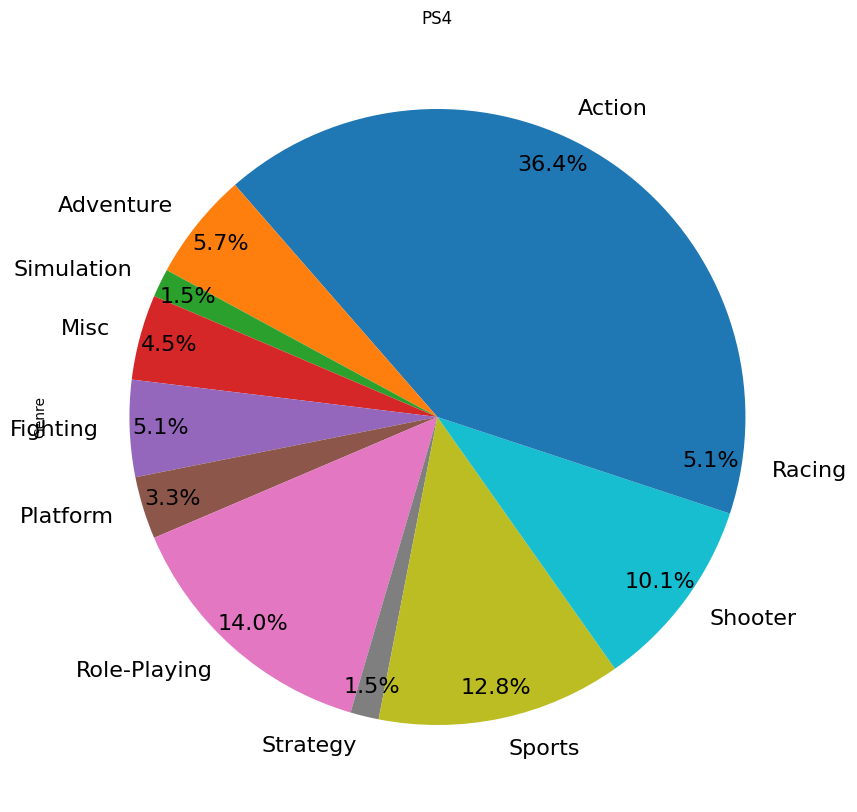

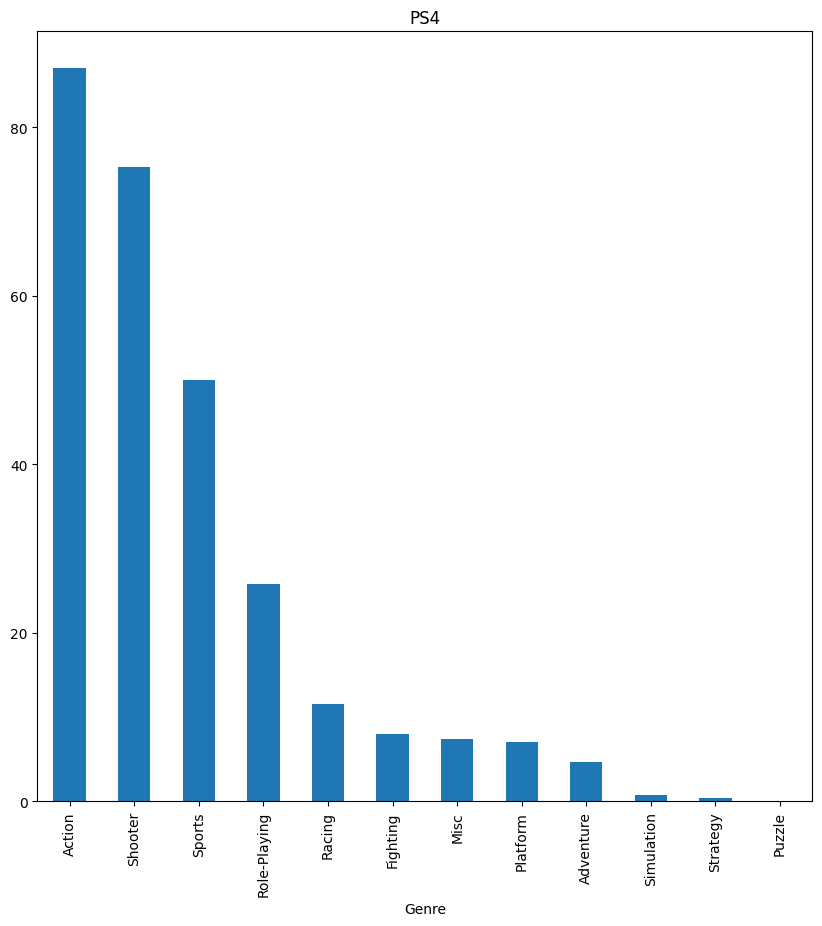

23/04/20 14:34:21 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 336063 ms exceeds timeout 120000 ms
23/04/20 14:34:21 WARN SparkContext: Killing executors is not supported by current scheduler.
23/04/20 14:34:21 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:301)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:103)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:87)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:643)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1057)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:238)
	at sc

Caused by: org.apache.spark.rpc.RpcEndpointNotFoundException: Cannot find endpoint: spark://CoarseGrainedScheduler@192.168.0.103:39823
	at org.apache.spark.rpc.netty.NettyRpcEnv.$anonfun$asyncSetupEndpointRefByURI$1(NettyRpcEnv.scala:148)
	at org.apache.spark.rpc.netty.NettyRpcEnv.$anonfun$asyncSetupEndpointRefByURI$1$adapted(NettyRpcEnv.scala:144)
	at scala.concurrent.Future.$anonfun$flatMap$1(Future.scala:307)
	at scala.concurrent.impl.Promise.$anonfun$transformWith$1(Promise.scala:41)
	at scala.concurrent.impl.CallbackRunnable.run(Promise.scala:64)
	at org.apache.spark.util.ThreadUtils$$anon$1.execute(ThreadUtils.scala:99)
	at scala.concurrent.impl.ExecutionContextImpl$$anon$4.execute(ExecutionContextImpl.scala:138)
	at scala.concurrent.impl.CallbackRunnable.executeWithValue(Promise.scala:72)
	at scala.concurrent.impl.Promise$DefaultPromise.dispatchOrAddCallback(Promise.scala:316)
	at scala.concurrent.impl.Promise$DefaultPromise.onComplete(Promise.scala:307)
	at scala.concurrent.imp

	at scala.concurrent.impl.Promise.transformWith(Promise.scala:40)
	at scala.concurrent.impl.Promise.transformWith$(Promise.scala:38)
	at scala.concurrent.impl.Promise$DefaultPromise.transformWith(Promise.scala:187)
	at scala.concurrent.Future.flatMap(Future.scala:306)
	at scala.concurrent.Future.flatMap$(Future.scala:306)
	at scala.concurrent.impl.Promise$DefaultPromise.flatMap(Promise.scala:187)
	at org.apache.spark.rpc.netty.NettyRpcEnv.asyncSetupEndpointRefByURI(NettyRpcEnv.scala:150)
	... 19 more
23/04/20 14:34:21 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:301)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.B

	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:238)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:2066)
	at org.apache.spark.Heartbeater$$anon$1.run(Heartbeater.scala:46)
	at java.base/java.util.concurrent.Executors$RunnableAdapter.call(Executors.java:515)
	at java.base/java.util.concurrent.FutureTask.runAndReset(FutureTask.java:305)
	at java.base/java.util.concurrent.ScheduledThreadPoolExecutor$ScheduledFutureTask.run(ScheduledThreadPoolExecutor.java:305)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	at java.base/java.lang.Thread.run(Thread.java:829)
Caused by: org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:301)
	at org.apache.spark.

	at org.apache.spark.rpc.netty.MessageLoop.org$apache$spark$rpc$netty$MessageLoop$$receiveLoop(MessageLoop.scala:75)
	at org.apache.spark.rpc.netty.MessageLoop$$anon$1.run(MessageLoop.scala:41)
	at java.base/java.util.concurrent.Executors$RunnableAdapter.call(Executors.java:515)
	at java.base/java.util.concurrent.FutureTask.run(FutureTask.java:264)
	... 3 more
Caused by: org.apache.spark.rpc.RpcEndpointNotFoundException: Cannot find endpoint: spark://CoarseGrainedScheduler@192.168.0.103:39823
	at org.apache.spark.rpc.netty.NettyRpcEnv.$anonfun$asyncSetupEndpointRefByURI$1(NettyRpcEnv.scala:148)
	at org.apache.spark.rpc.netty.NettyRpcEnv.$anonfun$asyncSetupEndpointRefByURI$1$adapted(NettyRpcEnv.scala:144)
	at scala.concurrent.Future.$anonfun$flatMap$1(Future.scala:307)
	at scala.concurrent.impl.Promise.$anonfun$transformWith$1(Promise.scala:41)
	at scala.concurrent.impl.CallbackRunnable.run(Promise.scala:64)
	at org.apache.spark.util.ThreadUtils$$anon$1.execute(ThreadUtils.scala:99)
	at

	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:592)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$register(BlockManagerMasterEndpoint.scala:630)
	at org.apache.spark.storage.BlockManagerMasterEndpoint$$anonfun$receiveAndReply$1.applyOrElse(BlockManagerMasterEndpoint.scala:123)
	at org.apache.spark.rpc.netty.Inbox.$anonfun$process$1(Inbox.scala:103)
	at org.apache.spark.rpc.netty.Inbox.safelyCall(Inbox.scala:213)
	at org.apache.spark.rpc.netty.Inbox.process(Inbox.scala:100)
	at org.apache.spark.rpc.netty.MessageLoop.org$apache$spark$rpc$netty$MessageLoop$$receiveLoop(MessageLoop.scala:75)
	at org.apache.spark.rpc.netty.MessageLoop$$anon$1.run(MessageLoop.scala:41)
	at java.base/java.util.concurrent.Executors$RunnableAdapter.call(Executors.java:515)
	at java.base/java.util.concurrent.FutureTask.run(FutureTask.java:264)
	... 3 more
Caused by: org.apache.spark.rpc.RpcE

	at org.apache.spark.rpc.netty.MessageLoop$$anon$1.run(MessageLoop.scala:41)
	... 3 more
23/04/20 14:34:22 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:301)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:103)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:87)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:643)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1057)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:238)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala

	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:593)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:592)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$register(BlockManagerMasterEndpoint.scala:630)
	at org.apache.spark.storage.BlockManagerMasterEndpoint$$anonfun$receiveAndReply$1.applyOrElse(BlockManagerMasterEndpoint.scala:123)
	at org.apache.spark.rpc.netty.Inbox.$anonfun$process$1(Inbox.scala:103)
	at org.apache.spark.rpc.netty.Inbox.safelyCall(Inbox.scala:213)
	at org.apache.spark.rpc.netty.Inbox.process(Inbox.scala

	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:593)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:592)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$register(BlockManagerMasterEndpoint.scala:630)
	at org.apache.spark.storage.BlockManagerMasterEnd

In [41]:
list_platforms = []
explode=(0.90, 0.90, 0.90, 0.90, 0.90, 0.90, 0.90, 0.90, 0.90, 0.90, 0.90, 0.90)
plataforms = psdf['Platform'].unique().to_list()

pie_df = pspd.DataFrame(psdf.sort_values(by=['Genre'], ascending=False).groupby(['Platform', 'Genre'])['Genre'].count()).xs('PS4',level=0)
pie_df = pie_df.where(pie_df['Genre'] > 1.5).dropna() # Somente vendas acima de 1.5 para não quebrar o gráfico
plot = pie_df.to_pandas().plot.pie(y='Genre', figsize=(10,10), title='PS4', fontsize=16, pctdistance=0.9, autopct='%1.1f%%',legend=False)
fig = plot.get_figure()
fig.savefig("../pyspark-project-vgsales/data/charts/"+"Pie_count_Genre_per_platform_percent_"+"PS4"+".png")


pd.DataFrame(new_df.xs('PS4',level=0).to_pandas()).sort_values(by='Global_Sales', ascending=False).plot.bar(title="PS4",  y='Global_Sales', figsize=(10,10), fontsize=10, legend=False)


#pie_df = pspd.DataFrame(psdf.sort_values(by=['Global_Sales'], ascending=False).groupby(['Platform', 'Genre'])['Global_Sales'].sum()).xs('PS4',level=0)
#pie_df = pie_df.where(pie_df['Global_Sales'] > 1.5).dropna() # Somente vendas acima de 1.5 para não quebrar o gráfico
#plot = pie_df.to_pandas().plot.pie(y='Global_Sales', figsize=(10,10), title='PS4', fontsize=16, autopct='%1.1f%%', pctdistance=0.9, legend=False)
#fig = plot.get_figure()
#fig.savefig("../pyspark-project-vgsales/data/charts/"+"Pie_Global_Sales_percent_Genre_"+"PS4"+".png")
#fig.savefig("../pyspark-project-vgsales/data/charts/"+"Pie_count_per_Genre_"+"PS4"+".png")
#fig.savefig("../pyspark-project-vgsales/data/charts/"+"Bar_count_per_Year_"+"PS4"+".png")
#fig.savefig("../pyspark-project-vgsales/data/charts/"+"Bar_count_total_per_Genre_"+"PS4"+".png")
plot

#plot = pd.DataFrame(new_df.xs('PS4',level=0).to_pandas()).sort_values(by='Global_Sales', ascending=False).plot.pie(title="PS4",  y='Global_Sales', figsize=(10,10), fontsize=16, autopct='%1.1f%%', legend=False)
#plot = pd.DataFrame(new_df.xs('PS4',level=0).to_pandas()).sort_values(by='Global_Sales', ascending=False).plot.pie(title="PS4",  y='Global_Sales', figsize=(10,10), fontsize=16, autopct='%1.1f%%', legend=False)
#fig = plot.get_figure()
#plot

pd.DataFrame(new_df.xs('PS4',level=0).to_pandas()).sort_values(by='Global_Sales', ascending=False).plot.bar(title="PS4",  y='Global_Sales', figsize=(10,10), fontsize=10, legend=False)



In [289]:
#
#Contagem de lançantos de cada plataforma por genero
df = pspd.DataFrame(group_df['Name'].count())
df.rename(columns={'Name': 'Games_Count'}, inplace=True)
#psdf2.index.names = ['Platform', 'Genre', 'Year']
df.head()

Games_Count
Platform Genre    Year             
X360     Shooter  2014           11
SNES     Misc     1992            1
XB       Racing   2003           35
SAT      Fighting 1997            4
         Racing   1996            1

In [292]:
#
#Contagem de lançantos de cada plataforma por genero

#psdf2.index.names = ['Platform', 'Genre', 'Year']
df.head()

,,Games_Count
Platform,Genre,
PS,Action,154
NES,Puzzle,14
WiiU,Strategy,3
GBA,Platform,139
Wii,Fighting,41


In [294]:
#
for index, row in df.loc['PS4'].sort_index(0, ascending=True).iterrows():
    print(index, type(index), row.values, type(row.values))

    
df.loc['PS4'].loc['Role-Playing'].sort_index(0, ascending=True)

Action <class 'str'> [122] <class 'numpy.ndarray'>
Adventure <class 'str'> [19] <class 'numpy.ndarray'>
Fighting <class 'str'> [17] <class 'numpy.ndarray'>
Misc <class 'str'> [15] <class 'numpy.ndarray'>
Platform <class 'str'> [11] <class 'numpy.ndarray'>
Puzzle <class 'str'> [1] <class 'numpy.ndarray'>
Racing <class 'str'> [17] <class 'numpy.ndarray'>
Role-Playing <class 'str'> [47] <class 'numpy.ndarray'>
Shooter <class 'str'> [34] <class 'numpy.ndarray'>
Simulation <class 'str'> [5] <class 'numpy.ndarray'>
Sports <class 'str'> [43] <class 'numpy.ndarray'>
Strategy <class 'str'> [5] <class 'numpy.ndarray'>


/tmp/ipykernel_63136/2636742512.py:5: FutureWarning: In a future version of pandas all arguments of Series.sort_index will be keyword-only.
  df.loc['PS4'].loc['Role-Playing'].sort_index(0, ascending=True)


Games_Count    47
Name: Role-Playing, dtype: int64

In [26]:
#
psdf[(psdf['Platform']=='3DO') & (psdf['Genre']=='Fighting')].sort_values(by='Global_Sales', ascending=False)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


In [5]:
#
psdf['Platform'].unique()

0      3DO
1       PC
2      PS3
3      NES
4       PS
5       DC
6      GEN
7      PS2
8      3DS
9     PCFX
10      GG
11    WiiU
12    SNES
13      GB
14     SCD
15     N64
16     PS4
17     PSP
18    2600
19    XOne
20    X360
21     GBA
22      WS
23     Wii
24      GC
25     PSV
26      XB
27      DS
28    TG16
29      NG
30     SAT
Name: Platform, dtype: object

In [104]:
#
df.sort_index(0, ascending=True)

Games_Count
Platform Genre                    
2600     Action                 55
         Adventure               1
         Fighting                1
         Misc                    5
         Platform                9
         Puzzle                  8
         Racing                  4
         Shooter                22
         Simulation              1
         Sports                 10
3DO      Adventure               1
         Puzzle                  1
         Simulation              1
3DS      Action                180
         Adventure              36
         Fighting               14
         Misc                   53
         Platform               28
         Puzzle                 19
         Racing                 10
         Role-Playing           85
         Shooter                 6
         Simulation             28
         Sports                 25
         Strategy               15
DC       Action                  3
         Adventure              11
         Fighting               12
         Platform                2
         Racing                  6
         Role-Playing            4
         Shooter                 3
         Simulation              1
         Sports                 10
DS       Action                335
         Adventure             238
         Fighting               36
         Misc                  389
         Platform               89
         Puzzle                236
         Racing                 66
         Role-Playing          196
         Shooter                42
         Simulation            280
         Sports                146
         Strategy               78
GB       Action                  6
         Adventure               5
         Misc                    8
         Platform               18
         Puzzle                 15
         Racing                  2
         Role-Playing           21
         Shooter                 1
         Simulation              5
         Sports                  9
         Strategy                7
GBA      Action                162
         Adventure              36
         Fighting               23
         Misc                   86
         Platform              139
         Puzzle                 39
         Racing                 64
         Role-Playing           73
         Shooter                40
         Simulation             18
         Sports                 88
         Strategy               18
GC       Action                 98
         Adventure              20
         Fighting               42
         Misc                   35
         Platform               73
         Puzzle                 12
         Racing                 60
         Role-Playing           25
         Shooter                48
         Simulation             12
         Sports                106
         Strategy               11
GEN      Action                  3
         Adventure               2
         Fighting                5
         Misc                    1
         Platform                7
         Racing                  1
         Role-Playing            3
         Shooter                 1
         Sports                  3
         Strategy                1
GG       Platform                1
N64      Action                 37
         Adventure               4
         Fighting               29
         Misc                   18
         Platform               30
         Puzzle                 12
         Racing                 57
         Role-Playing            7
         Shooter                24
         Simulation             10
         Sports                 79
         Strategy                9
NES      Action                 13
         Adventure               1
         Fighting                4
         Misc                    2
         Platform               28
         Puzzle                 14
         Racing                  4
         Role-Playing           11
         Shooter                 

In [167]:
#
df.xs("Shooter", level=1).sort_index(0, ascending=False)

,Games_Count
Platform,
XOne,33
XB,124
X360,197
WiiU,10
Wii,61
TG16,1
SNES,10
SAT,22
PSV,5


In [15]:
#
tuple_list = [] 

for index, row in df.loc['PS4'].sort_index(0, ascending=False).iterrows():
    #print(index[0])
    tuple_list.append(['PS4', tuple([int(index[1]), int(row.Name)]), int(index[1]), int(row.Name)])

#tuple_list
    
df.loc['PS4'].loc['Role-Playing'].sort_index(0, ascending=False)

KeyError: 'PS4'

/opt/spark/python/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_numpy` loads all data into the driver's memory. It should only be used if the resulting NumPy ndarray is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


<Axes: >

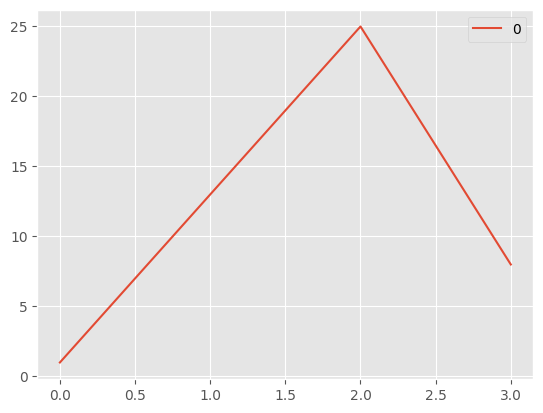

In [16]:
sns.lineplot(df.loc['PS4'].loc['Role-Playing'].sort_index(0, ascending=False).to_numpy())

#df.index('X360',      'Shooter', '2014')



#psdf2.loc['PS4'].loc['Role-Playing'].hist()

In [54]:
df.loc['PS4'].loc['Role-Playing'].sort_index(0, ascending=True)

,Name
Year,
2014,8
2015,25
2016,13
2017,1


In [55]:
df.head()

Name
Platform Genre    Year      
X360     Shooter  2014    11
SNES     Misc     1992     1
XB       Racing   2003    35
SAT      Fighting 1997     4
         Racing   1996     1

In [12]:
df_teste = psdf.to_pandas()

/opt/spark/python/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas DataFrame is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


/opt/spark/python/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas DataFrame is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


<Axes: xlabel='Count', ylabel='Year'>

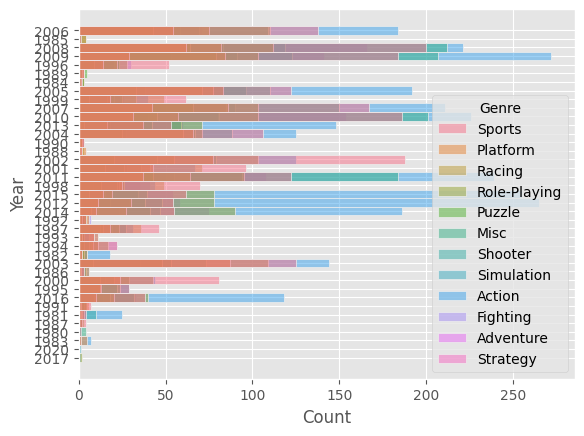

In [26]:
sns.histplot(data=psdf.to_pandas(), y="Year", hue="Genre")

/opt/spark/python/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas DataFrame is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


<Axes: xlabel='Percent', ylabel='Platform'>

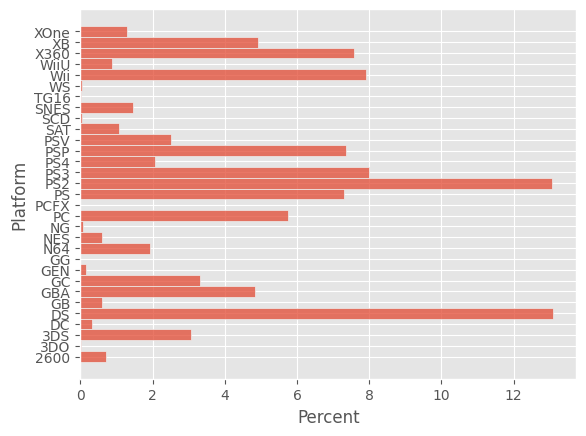

In [56]:
sns.histplot(data=psdf.sort_values(by='Platform', ascending=False).to_pandas(), y="Platform", stat="percent")

/opt/spark/python/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas DataFrame is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


<Axes: xlabel='Percent', ylabel='Platform'>

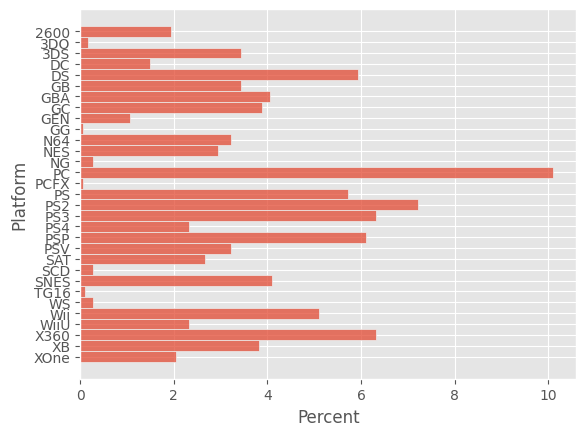

In [62]:
sns.histplot(data=df.to_pandas().sort_values('Platform', ascending=True), y="Platform", stat="percent")

In [68]:
df.head()

Name
Platform Genre    Year      
X360     Shooter  2014    11
SNES     Misc     1992     1
XB       Racing   2003    35
SAT      Fighting 1997     4
         Racing   1996     1

In [111]:
#df.loc[['Platform', 'Shooter', '2014'],['Name']]


df.head()

Games_Count
Platform Genre    Year             
X360     Shooter  2014           11
SNES     Misc     1992            1
XB       Racing   2003           35
SAT      Fighting 1997            4
         Racing   1996            1

In [100]:
df.xs("Shooter", level=1).sort_index(0, ascending=True)

Name
Platforma Ano       
2600      1980     2
          1981    10
          1982     5
          1983     1
          1986     1
          1987     2
          1988     1
3DS       2011     4
          2012     1
          2013     1
DC        1998     1
          2000     1
          2007     1
DS        2005     4
          2006     7
          2007     8
          2008     9
          2009     7
          2010     4
          2011     3
GB        1989     1
GBA       2001     4
          2002    17
          2003     6
          2004    10
          2005     2
          2006     1
GC        2002    14
          2003    14
          2004    12
          2005     7
          2006     1
GEN       1992     1
N64       1996     1
          1997     5
          1998     6
          1999     9
          2000     3
NES       1984     3
          1985     1
          1986     3
PC        1992     1
          1994     2
          1997     1
          2001     1
          2002     3
          2003     4
          2004     9
          2005     9
          2006     4
          2007    13
          2008    10
          2009    17
          2010    12
          2011    21
          2012     9
          2013    11
          2014     7
          2015     5
          2016     6
PS        1994     4
          1995    18
          1996    16
          1997    17
          1998    15
          1999     7
          2000    10
          2001     8
          2002     1
PS2       2000     6
          2001    19
          2002    26
          2003    21
          2004    30
          2005    29
          2006    14
          2007     3
          2008     6
          2009     3
          2010     1
PS3       2006     2
          2007    15
          2008    22
          2009    19
          2010    19
          2011    28
          2012    19
          2013    17
          2014    10
          2015     3
          2016     1
PS4       2013     3
          2014     7
          2015    11
          2016    13
PSP       2005     5
          2006    11
          2007    12
          2008     1
          2009     4
          2010     4
PSV       2011     1
          2012     2
          2013     1
          2014     1
SAT       1994     3
          1995     9
          1996     5
          1997     4
          1998     1
SNES      1991     3
          1992     1
          1993     2
          1994     2
          1995     1
          1996     1
TG16      1995     1
Wii       2006     3
          2007    13
          2008    13
          2009    13
          2010    13
          2011     6
WiiU      2012     2
          2013     5
          2014     1
          2015     1
          2016     1
X360      2005     3
          2006    16
          2007    20
          2008    22
          2009    28
          2010    28
          2011    31
          2012    15
          2013    19
          2014    11
          2015     3
          2016     1
XB        2001     4
          2002    18
          2003    28
          2004    27
          2005    37
          2006    10
XOne      2013     2
          2014    10
          2015    11
          2016    10

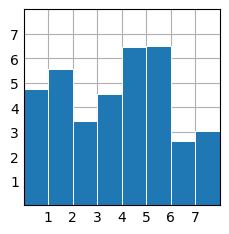

In [14]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('_mpl-gallery')

# make data:
np.random.seed(3)
x = 0.5 + np.arange(8)
y = np.random.uniform(2, 7, len(x))

# plot
fig, ax = plt.subplots()

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

In [119]:
#
df_rpg = psdf.where((psdf['Genre'] == 'Role-Playing')).dropna().sort_values('Name', ascending=True)
df_role_playing = psdf.where((psdf['Genre'] == 'Role-Playing') & (psdf['Year'] == '1998')).dropna().sort_values('Name', ascending=True)
df_rpg[df_rpg['Year'].eq('1997')].sort_values('Global_Sales', ascending=False).head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
66,67.0,Final Fantasy VII,PS,1997,Role-Playing,Sony Computer Entertainment,3.01,2.47,3.28,0.96,9.72
630,631.0,Final Fantasy Tactics,PS,1997,Role-Playing,SquareSoft,0.93,0.12,1.34,0.06,2.45
1451,1453.0,SaGa Frontier,PS,1997,Role-Playing,SquareSoft,0.15,0.04,1.07,0.09,1.35
1643,1645.0,Chocobo no Fushigi Dungeon,PS,1997,Role-Playing,SquareSoft,0.00,0.00,1.14,0.08,1.22
1993,1995.0,Tales of Destiny,PS,1997,Role-Playing,Namco Bandai Games,0.09,0.06,0.83,0.07,1.04
2056,2058.0,Breath of Fire III,PS,1997,Role-Playing,Capcom,0.29,0.19,0.46,0.07,1.00
3226,3228.0,Final Fantasy VII International,PS,1997,Role-Playing,Square,0.00,0.00,0.59,0.04,0.63
3444,3446.0,Diablo,PS,1997,Role-Playing,Electronic Arts,0.29,0.19,0.07,0.04,0.58
3987,3989.0,RPG Maker,PS,1997,Role-Playing,ASCII Entertainment,0.11,0.07,0.29,0.03,0.50
4600,4602.0,Grandia,SAT,1997,Role-Playing,ESP,0.00,0.00,0.42,0.00,0.42
